# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

In [3]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
len(data)

70000

Построим boxplot для всех количественных переменных.

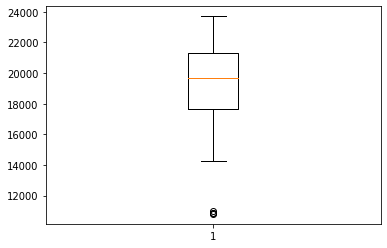

In [25]:
b_p_age = boxplot(data['age'], showfliers = True) 

Возможно выбросами являются значения меньшие 13000 дней. Для проверки этой гипотизы дополнительно построим гистограмму.

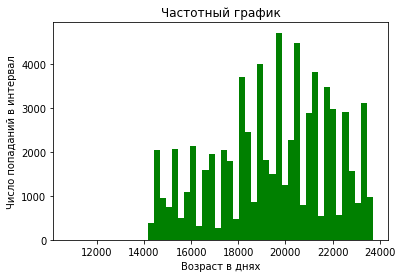

In [21]:
n, bins, patches = plt.hist(data['age'], 50, facecolor='g')

plt.xlabel('Возраст в днях')
plt.ylabel('Число попаданий в интервал')
plt.title('Частотный график')
plt.show()

В результате построения гистограммы, гипотеза о наличии выбросов не подтверждается.

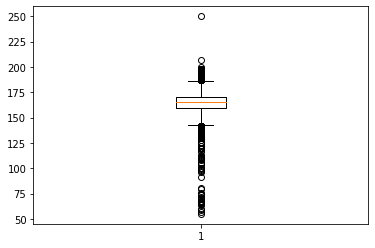

In [24]:
b_p_height = boxplot(data['height'], showfliers = True) 

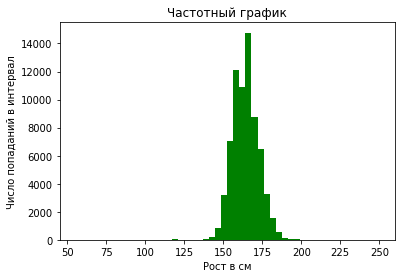

In [36]:
n, bins, patches = plt.hist(data['height'], 50, facecolor='g')

plt.xlabel('Рост в см')
plt.ylabel('Число попаданий в интервал')
plt.title('Частотный график')
plt.show()

In [33]:
data_1 = data[(data.height < 200) & (data.height > 125)]
data_1.head()
len(data_1)

69906

94 значения были отфильтрованы по росту.

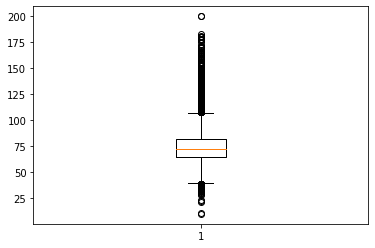

In [35]:
b_p_weight = boxplot(data_1['weight'], showfliers = True)

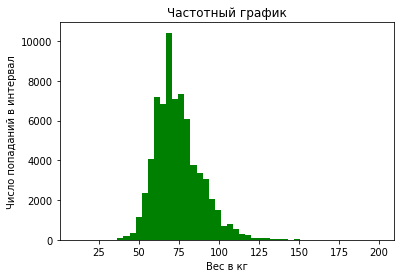

In [38]:
n, bins, patches = plt.hist(data_1['weight'], 50, facecolor='g')

plt.xlabel('Вес в кг')
plt.ylabel('Число попаданий в интервал')
plt.title('Частотный график')
plt.show()

In [41]:
data_2 = data_1[(data_1.weight < 140) & (data_1.weight > 30)]
data_2.head()
len(data_2)

69790

116 значений было отфильтровано по весу.

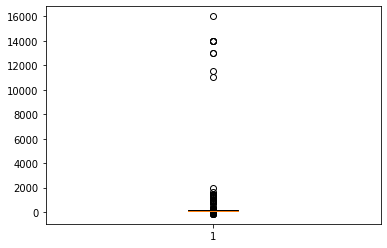

In [50]:
b_p_ap_hi = boxplot(data_2['ap_hi'], showfliers = True)

In [47]:
min(data_2.ap_hi)

-150

In [48]:
max(data_2.ap_hi)

16020

In [61]:
data_3 = data_2[(data_2.ap_hi < 250) & (data_2.ap_hi > 50)]
data_3.head()
len(data_3)

69564

226 значений было отфильтровано по сердечному давлению.

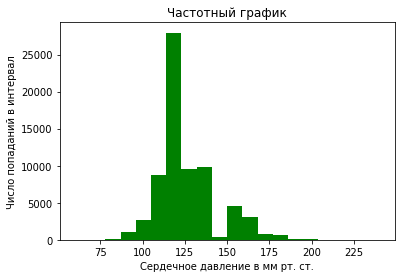

In [60]:
n, bins, patches = plt.hist(data_3['ap_hi'], 20, facecolor='g')

plt.xlabel('Сердечное давление в мм рт. ст.')
plt.ylabel('Число попаданий в интервал')
plt.title('Частотный график')
plt.show()

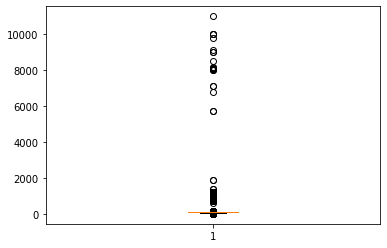

In [55]:
b_p_ap_lo = boxplot(data_3['ap_lo'], showfliers = True)

In [83]:
data_4 = data_3[(data_3.ap_lo < 200) & (data_3.ap_lo > 0)]
data_4.head()
len(data_4)

68612

952 значения было отфильтровано по сосудистому давлению.

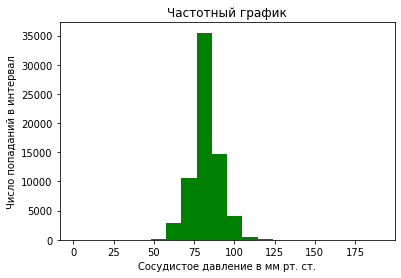

In [66]:
n, bins, patches = plt.hist(data_4['ap_lo'], 20, facecolor='g')

plt.xlabel('Сосудистое давление в мм рт. ст.')
plt.ylabel('Число попаданий в интервал')
plt.title('Частотный график')
plt.show()

Найдем максимальное и минимальное значения по категориальным переменным.

In [80]:
print('gender: \t','min =', min(data_4.gender), ', max =', max(data_4.gender))
print('cholesterol: \t','min =', min(data_4.cholesterol), ', max =', max(data_4.cholesterol))
print('gluc: \t \t','min =', min(data_4.gluc), ', max =', max(data_4.gluc))
print('smoke: \t \t','min =', min(data_4.smoke), ', max =', max(data_4.smoke))
print('active: \t','min =', min(data_4.active), ', max =', max(data_4.active))
print('cardio: \t','min =', min(data_4.cardio), ', max =', max(data_4.cardio))

gender: 	 min = 1 , max = 2
cholesterol: 	 min = 1 , max = 3
gluc: 	 	 min = 1 , max = 3
smoke: 	 	 min = 0 , max = 1
active: 	 min = 0 , max = 1
cardio: 	 min = 0 , max = 1


In [90]:
input_x = data_4.iloc[ : , 1: -1]
input_x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [91]:
y = data_4['cardio']

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_x, y, test_size = 0.2)

In [93]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


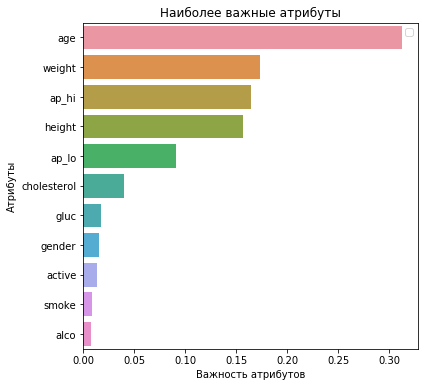

In [94]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [101]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7030
           1       0.71      0.69      0.70      6693

    accuracy                           0.71     13723
   macro avg       0.71      0.71      0.71     13723
weighted avg       0.71      0.71      0.71     13723



0.7101216935072506

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Атрибуты, которые оказывают наибольшее влияние на вероятность развития болезней сердца:
* возраст;
* вес;
* сердечное давление;
* рост;
* сосудистое давление.

Построим матрицу кореляций.

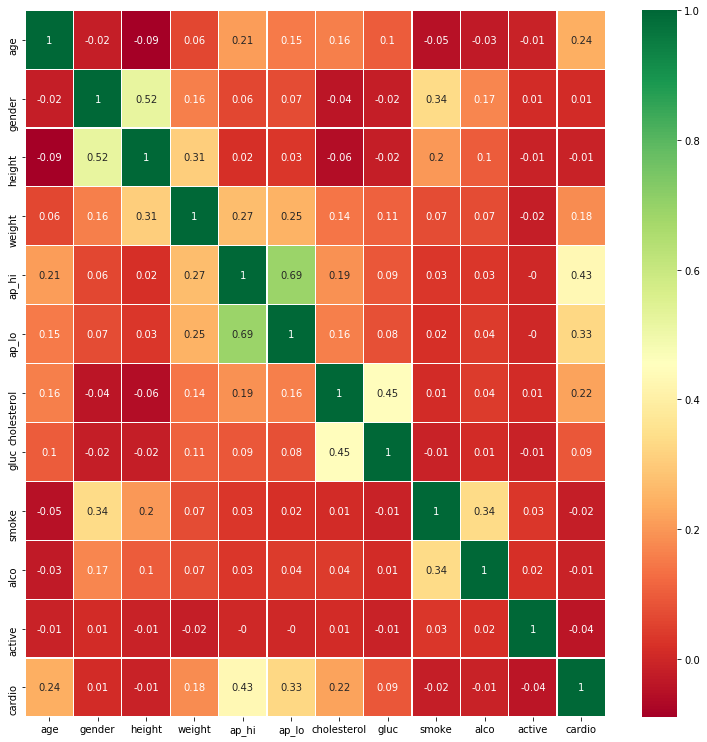

In [100]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data_4.iloc[ : , 1: ].corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

Здесь получены иные результаты.
Атрибуты, которые оказывают наибольшее влияние на вероятность развития болезней сердца:
* сердечное давление;
* сосудистое давление;
* возраст;
* вес.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

Так как разные способы определения влияющих переменных дали разные результаты, то проведем проверку двух атрибутов: возраста и сердечного давления.

In [110]:
diseased = data_4[data_4.cardio == 1]
diseased.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1


In [109]:
normal = data_4[data_4.cardio == 0]
normal.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [113]:
print(stats.ttest_ind(diseased.age, normal.age))

Ttest_indResult(statistic=64.7827027374398, pvalue=0.0)


Возраст статистически значим различается у людей без сердечных заболеваний и у людей с сердечными заболеваниями.

In [115]:
mean(diseased.age)/365.25

54.9331807939731

In [116]:
mean(normal.age)/365.25

51.689045606336734

In [112]:
print(stats.ttest_ind(diseased.ap_hi, normal.ap_hi))

Ttest_indResult(statistic=123.06961839388799, pvalue=0.0)


Сердечное давление статистически значимо различается у людей без сердечных заболеваний и у людей с сердечными заболеваниями.

In [118]:
mean(diseased.ap_hi)

133.79727141468015

In [119]:
mean(normal.ap_hi)

119.55218457101658

У атрибута 'сердечное давление' значение t-статистики больше, следовательно можно считать, что самый важный атрибут -- сердечное давление.